# Implement Linear Regression from scratch with Numpy (80 points)
# $$f(x) =\sum_{n=0}^{M-1}{(w[n]*x[n])}+b$$
For example, when the feature vector x has 2 components/attributes, then f(x) = w[0] * x[0] + w[1] * x[1] + b

### if your program crashes, you will get zero point.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression as sk_LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
housing=pd.read_csv('boston_housing.csv')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
housing.shape

(506, 14)

In [4]:
X = housing.iloc[:,:-1].values # each data point/sample/vector has 13 components/attributes
Y = housing.iloc[:,-1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [5]:
sk_model=sk_LinearRegression()
sk_model.fit(X_train, Y_train)

LinearRegression()

In [6]:
Y_test_pred=sk_model.predict(X_test)

In [7]:
# Calculate errors on test set
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)

MSE= 33.4489799976764
MAE= 3.842909220444493
MAPE= 0.18356285293906452


Text(0, 0.5, 'y_pred')

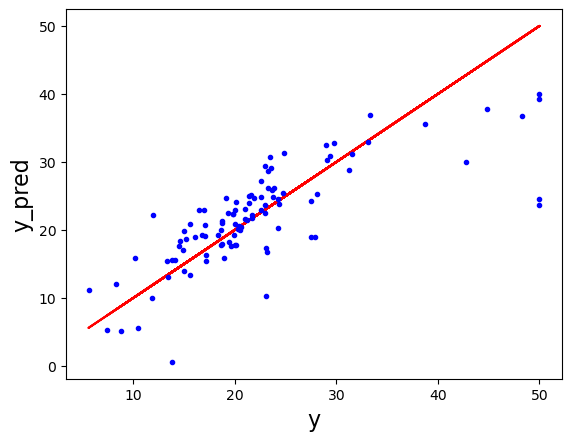

In [8]:
fig, ax = plt.subplots()
ax.plot(Y_test, Y_test, '-r')
ax.plot(Y_test, Y_test_pred, '.b')
ax.set_xlabel('y', fontsize=16)
ax.set_ylabel('y_pred', fontsize=16)

## Let's implement MyLinearRegression using gradient descent
read lecture notes (e.g., SimpleLinearRegression_implementation.ipynb) \
you need to implement MyLinearRegression in the cell below and run the whole file \
you will get zero point if you do not use gradient desent that is shown in SimpleLinearRegression_implementation.ipynb

In [ ]:
class MyLinearRegression:
    def __init__(self, learning_rate, max_iter):
        self.learning_rate=learning_rate
        self.max_iter=max_iter
    
    def fit(self, X, Y):
        #X.shape is (N, M)
        #Y.shape is (N,)        
        #N is the number of samples
        #M is the number of components/attributes per sample
        #requirements:
        #    no more than 7 lines of code, do not use ";"
        #    the funtion fit needs to work for any positive N and M
        #    otherwise you get zero point for this entire task
        N, M = X.shape
        self.w, self.b = np.zeros(M), 0
        for _ in range(self.max_iter):
            dL_dw = -(2 * np.dot((X.T), (Y - self.predict(X)))) / N
            dL_db = -2 * np.sum(Y - self.predict(X)) / N
            self.w = self.w - self.learning_rate * dL_dw
            self.b = self.b - self.learning_rate * dL_db

            '''
            # Debugging statements
            if _ % 100 == 0:
                print(f"Iteration {_}: w = {self.w}, b = {self.b}")
            if np.isnan(self.w).any() or np.isnan(self.b):
                print("NaN detected in weights or bias")
                break
            '''

    def predict(self, X):
        #X.shape is (N, M)
        return X.dot(self.w) + self.b

In [10]:
#set suitable values of learning_rate and max_iter
#it may take a while to fit the model to the data
#if your program crashes, you get zero point for this entire task
my_model=MyLinearRegression(learning_rate=1e-6, max_iter=1000000)
my_model.fit(X_train, Y_train)

In [11]:
#do not modify this cell
my_Y_test_pred=my_model.predict(X_test)
my_Y_test_pred

array([22.55830653, 23.69749548, 26.1358557 , 13.09885533, 20.63962466,
       21.65739079, 19.838543  , 22.77258705, 15.99566769, 18.70561282,
        2.93904254, 13.13676001, 18.98850985,  6.09624681, 36.56729093,
       31.04159676, 21.8187105 , 34.85691793, 27.73326209, 22.3652241 ,
       25.38066674, 21.57614653, 21.80937313, 28.73711763, 20.30518409,
        6.50119913, 20.61481688, 18.01044126, 35.54572611, 20.54154832,
       18.74243469, 20.00575484, 22.59707476, 23.16360265, 26.96548355,
       19.40898164, 12.59053861, 22.51412819, 14.37426516, 14.69005666,
       22.25833402, 18.79651304, 20.68491808, 14.90111873, 23.42657939,
       25.15210372, 17.61163967, 21.63630395, 10.25120559, 26.35004652,
       17.05069328, 16.65777359, 22.37370058, 32.92105331, 15.49815694,
       19.22982037, 20.01611717, 17.01192542,  9.85532704, 20.16755824,
       21.29831919, 21.62324518, 30.34004734, 27.89732188, 16.84314808,
       29.57596509, 21.02743052, 19.8433949 , 17.28588171, 20.90

In [12]:
#calculate MSE, MAE, and MAPE on the test set
#print the values of MSE, MAE, and MAPE 
MSE = np.mean((my_Y_test_pred - Y_test) ** 2)
MAE = np.mean(np.abs(my_Y_test_pred - Y_test))
MAPE = np.mean(np.abs(my_Y_test_pred - Y_test) / Y_test)
print(f'MSE {MSE}\nMAE {MAE}\nMAPE {MAPE}')

MSE 36.56137612380493
MAE 3.8836553132355958
MAPE 0.1855729077982253


Text(0, 0.5, 'Y_test_pred')

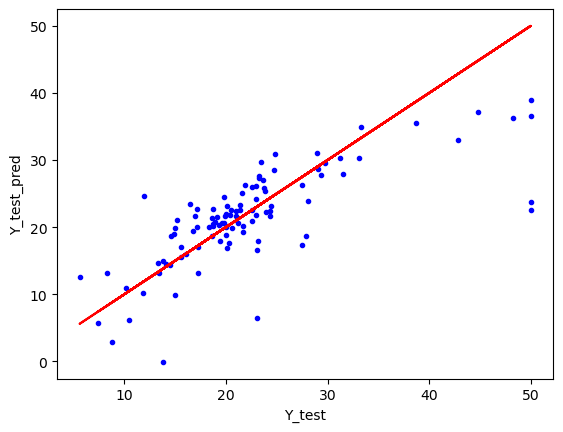

In [13]:
#plot the 45-degree line and the predicted data points (my_Y_test_pred)
fix, ax = plt.subplots()
ax.plot(Y_test, Y_test, '-r')
ax.scatter(Y_test, my_Y_test_pred, c='b', marker='.')
ax.set_xlabel('Y_test')
ax.set_ylabel('Y_test_pred')

In [14]:
#do not modify this cell
difference=np.mean(np.abs(my_Y_test_pred-Y_test_pred)/np.abs(Y_test_pred.mean()))
difference

0.07597419270579359

In [15]:
#do not modify this cell
if difference > 0.1:
    print('the result is not acceptable, and you lose all the points of this task')